# Working with complicated dataset

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [15]:
import pandas as pd
import requests
from io import StringIO

# Define the headers explicitly
headers = [
    "query acc.ver", "subject acc.ver", "% identity", "alignment length",
    "mismatches", "gap opens", "q. start", "q. end", "s. start", "s. end",
    "evalue", "bit score", "% positives", "bonds", "publications", "placeholder"
]

# Define the data URL
data_url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"

# Download the file content
response = requests.get(data_url)
if response.status_code == 200:
    raw_csv = response.text
else:
    raise Exception(f"Failed to fetch data from URL: {data_url}")

# Load the dataset while forcing the correct headers
raw_blast_data = pd.read_csv(
    StringIO(raw_csv),
    skiprows=7,  # Skip metadata rows
    names=headers,  # Explicitly set headers
    sep=",",  # Assuming comma-delimited
    quotechar='"',
    skip_blank_lines=True,
    engine="python"
)
raw_blast_data = raw_blast_data.drop(columns=["query acc.ver"])



# Confirm the headers
print(raw_blast_data.columns)
raw_blast_data.head()

Index(['subject acc.ver', '% identity', 'alignment length', 'mismatches',
       'gap opens', 'q. start', 'q. end', 's. start', 's. end', 'evalue',
       'bit score', '% positives', 'bonds', 'publications', 'placeholder'],
      dtype='object')


,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,placeholder
0,NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9,NaN
1,AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47,NaN
2,YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13,NaN
3,ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41,NaN
4,AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3,NaN


### Question 2
What is the average number of publications?

In [16]:
print(raw_blast_data["publications"])


0      9
1     47
2     13
3     41
4      3
      ..
95     6
96    19
97    37
98     5
99    32
Name: publications, Length: 100, dtype: object


In [17]:
### Your code here . . .
raw_blast_data["publications"] = pd.to_numeric(raw_blast_data["publications"], errors="coerce")
average_publications = raw_blast_data["publications"].mean()

print(f"Average number of publications: {average_publications}")


Average number of publications: 26.989690721649485


### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [18]:
print(raw_blast_data["bonds"])

raw_blast_data['bonds'] = raw_blast_data['bonds'].astype(str).str.replace(',', '').astype(int)

filtered_subject_acc_ver_with_bonds = raw_blast_data.loc[raw_blast_data['bonds'] > 15000, ['subject acc.ver', 'bonds']]
filtered_subject_acc_ver_with_bonds_list = filtered_subject_acc_ver_with_bonds.to_records(index=False)
filtered_subject_acc_ver_with_bonds_list.tolist()


0       1,487 
1      17,947 
2      12,106 
3       2,319 
4      18,964 
        ...   
95     17,348 
96      7,105 
97     18,940 
98     18,762 
99      3,209 
Name: bonds, Length: 100, dtype: object


[('AGK29621.1', 17947),
 ('AHG32084.1', 18964),
 ('6G2J_H', 15663),
 ('YP_002791042.1', 15830),
 ('AGK29634.1', 17381),
 ('0806162F', 17499),
 ('YP_009112408.1', 16861),
 ('YP_001876469.1', 16274),
 ('YP_009092269.1', 16170),
 ('AHG32149.1', 19706),
 ('YP_009092074.1', 15023),
 ('YP_009450474.1', 18777),
 ('YP_004123270.1', 17739),
 ('YP_009092073.1', 17523),
 ('AHZ60901.1', 15963),
 ('YP_004123350.1', 16017),
 ('YP_009453754.1', 18973),
 ('ADD46492.1', 18196),
 ('YP_007025968.1', 16113),
 ('YP_009453806.1', 15809),
 ('YP_007024956.1', 19998),
 ('ASM92364.1', 19932),
 ('YP_006073044.1', 19814),
 ('ASM92494.1', 18372),
 ('ADG95699.1', 18573),
 ('YP_004891275.1', 16721),
 ('YP_009166014.1', 17627),
 ('YP_009538416.1', 19875),
 ('YP_009414182.1', 18207),
 ('YP_009178854.1', 15913),
 ('YP_009414415.1', 19020),
 ('YP_009353908.1', 19044),
 ('YP_009093743.1', 15876),
 ('ABX45285.1', 17348),
 ('YP_009414156.1', 18940),
 ('YP_009414363.1', 18762)]

### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

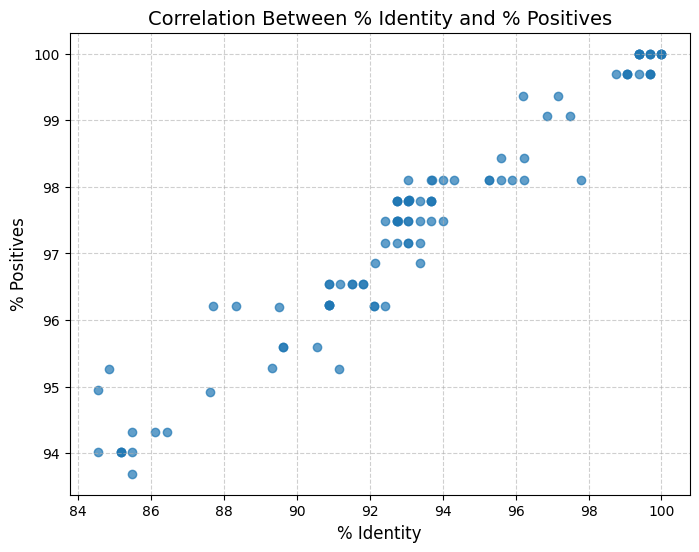

In [19]:
import matplotlib.pyplot as plt

# Convert `% identity` and `% positives` columns to numeric for plotting
raw_blast_data['% identity'] = pd.to_numeric(raw_blast_data['% identity'], errors='coerce')
raw_blast_data['% positives'] = pd.to_numeric(raw_blast_data['% positives'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(raw_blast_data['% identity'], raw_blast_data['% positives'], alpha=0.7)
plt.title("Correlation Between % Identity and % Positives", fontsize=14)
plt.xlabel("% Identity", fontsize=12)
plt.ylabel("% Positives", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [20]:
### Your code here . . .
protein_source_df = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv")

merged_data = raw_blast_data.merge(
    protein_source_df,
    left_on="subject acc.ver",
    right_on="Protein",
    how="left"
)


merged_data.rename(columns={'Source': 'Protein source'}, inplace=True)
merged_data.drop(columns=["Protein", "Unnamed: 0"], inplace=True)
merged_data['Protein source'].fillna('NA', inplace=True)
merged_data.head()

C:\Users\natha\AppData\Local\Temp\ipykernel_11172\1860862696.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Protein source'].fillna('NA', inplace=True)


,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,placeholder,Protein source
0,NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0,NaN,RefSeq
1,AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0,NaN,NA
2,YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0,NaN,GenPept
3,ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0,NaN,NA
4,AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0,NaN,NA
